### SVR — Model Definition and Evaluation

This section defines and evaluates a Support Vector Regression model using the RBF (Radial Basis Function) kernel. The `run_svr_model` function carries out the following steps:

- **Data Scaling**: Applies `StandardScaler` to standardise input features, which is important for SVR performance.
- **Train-Test Split**: Splits the scaled data into 80% training and 20% testing sets.
- **Model Training**: Trains an `SVR` model with configurable hyperparameters: `kernel`, `C`, and `epsilon`.
- **Prediction and Evaluation**: Evaluates the model using:
  - R² score on the test set,
  - Mean Absolute Error (MAE),
  - Root Mean Squared Error (RMSE),
  - 5-fold Cross-Validated R² to estimate generalisation performance.

This function provides a comprehensive overview of SVR model performance on the chosen target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


dataset = pd.read_csv('clean_dataset.csv')
dataset.columns = dataset.columns.str.strip()
X = dataset.drop(columns=['roughness', 'tension_strenght', 'elongation'])

def run_svr_model(X, y, target_name, kernel='rbf', C=1.0, epsilon=0.1):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    model = SVR(kernel=kernel, C=C, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    cv_mean_r2 = np.mean(cv_scores)

    print(f"SVR Results for {target_name} (kernel={kernel}, C={C}, epsilon={epsilon}):")
    print(f"Train-Test Split R² Score: {r2:.4f}")
    print(f"Cross-Validated R² (mean): {cv_mean_r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

run_svr_model(X, dataset['roughness'], 'Roughness')
run_svr_model(X, dataset['elongation'], 'Elongation')
run_svr_model(X, dataset['tension_strenght'], 'Tension Strength')




SVR Results for Roughness (kernel=rbf, C=1.0, epsilon=0.1):
Train-Test Split R² Score: -0.0644
Cross-Validated R² (mean): -11.7507
MAE: 55.0977
RMSE: 64.5290
SVR Results for Elongation (kernel=rbf, C=1.0, epsilon=0.1):
Train-Test Split R² Score: 0.8129
Cross-Validated R² (mean): -0.5629
MAE: 0.2417
RMSE: 0.2918
SVR Results for Tension Strength (kernel=rbf, C=1.0, epsilon=0.1):
Train-Test Split R² Score: 0.2031
Cross-Validated R² (mean): -1.1070
MAE: 5.5211
RMSE: 6.9292


### SVR Model: Actual vs Predicted Plot

This block defines and visualises the performance of an SVR model using a scatter plot to compare actual versus predicted values.

The function `run_and_plot_svr` performs:
- **Train-Test Split**: Randomly splits the data (80% train, 20% test).
- **Pipeline Construction**: Combines `StandardScaler` and `SVR` into a pipeline for clean preprocessing and modelling.
- **Model Fitting**: Trains the pipeline on the training data.
- **Prediction**: Generates predictions on the test set.
- **Visualisation**: Plots actual target values against predicted ones for qualitative performance assessment, with a red dashed line representing the ideal 1:1 relationship.

This visual tool helps detect under/overprediction patterns and the model's accuracy distribution.

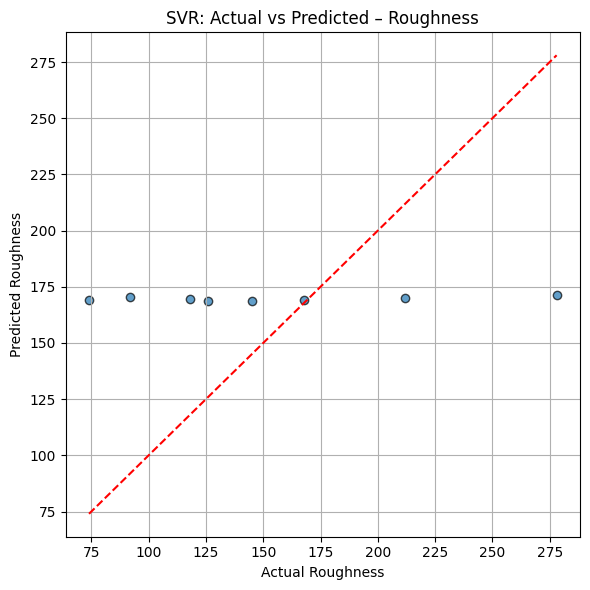

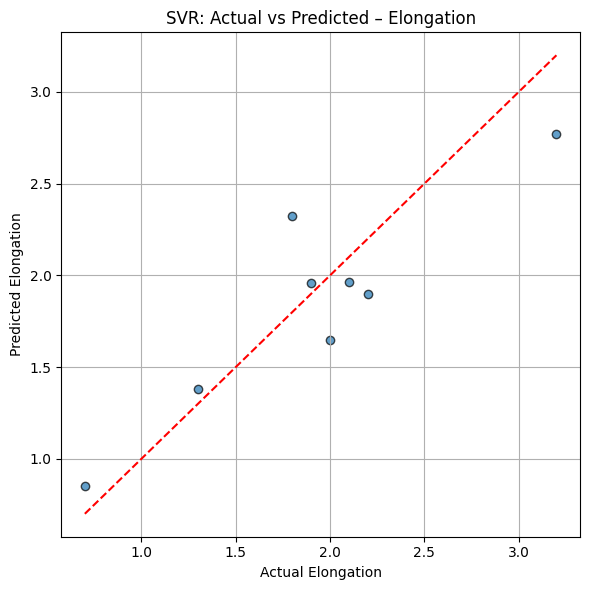

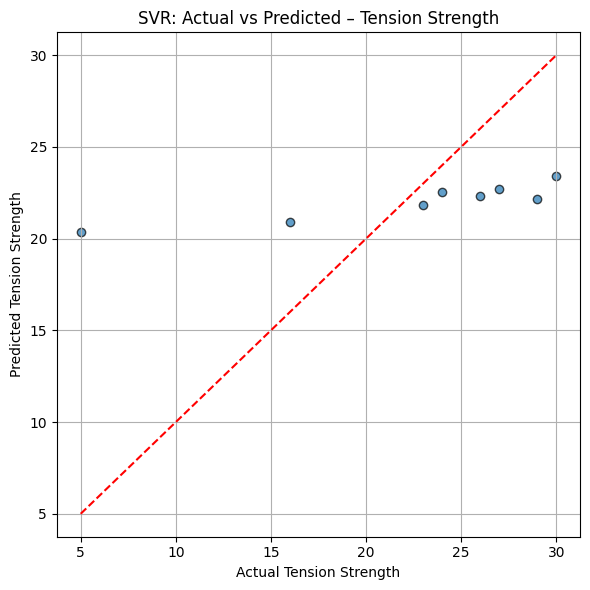

(19    29
 16    23
 15    27
 26    24
 4      5
 12    16
 37    30
 27    26
 Name: tension_strenght, dtype: int64,
 array([22.17951883, 21.83482404, 22.71964505, 22.55964103, 20.34461452,
        20.93362637, 23.42048356, 22.31724534]))

In [2]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def run_and_plot_svr(X, y, target_name, C=1.0, epsilon=0.1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = make_pipeline(StandardScaler(), SVR(C=C, epsilon=epsilon))

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"SVR: Actual vs Predicted – {target_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return y_test, y_pred

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

run_and_plot_svr(X, dataset['roughness'], "Roughness")

run_and_plot_svr(X, dataset['elongation'], "Elongation")

run_and_plot_svr(X, dataset['tension_strenght'], "Tension Strength")

### SVR Model: Cross-Validation R² Scores

This block evaluates the performance of the SVR model using **5-fold cross-validation** for each target variable (`Roughness`, `Elongation`, and `Tension Strength`).

- A pipeline is constructed using `StandardScaler` followed by `SVR(C=1.0, epsilon=0.1)`.
- `cross_val_score` is used with `scoring='r2'` to assess the model's R² performance across 5 folds.
- The **mean** and **standard deviation** of R² scores are printed for each target to provide a reliable estimate of generalisation performance.

This method helps assess the stability of the SVR model across different subsets of the data, offering a more robust evaluation than a single train-test split.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

def run_svr_crossval(X, y, target_name):
    pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"\nCross-Validation R² for {target_name}:")
    print("Scores:", scores)
    print(f"Mean: {np.mean(scores):.4f} | Std Dev: {np.std(scores):.4f}")

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

run_svr_crossval(X, dataset['roughness'], 'Roughness')
run_svr_crossval(X, dataset['elongation'], 'Elongation')
run_svr_crossval(X, dataset['tension_strenght'], 'Tension Strength')




Cross-Validation R² for Roughness:
Scores: [-4.22240893e+01 -7.65015721e-01 -3.06548860e-02 -2.88505280e+00
 -1.27273704e+01]
Mean: -11.7264 | Std Dev: 15.9137

Cross-Validation R² for Elongation:
Scores: [-3.82104598  0.59308432  0.65143317  0.38620348 -0.28229843]
Mean: -0.4945 | Std Dev: 1.6960

Cross-Validation R² for Tension Strength:
Scores: [-4.73404357  0.09984781  0.15729961  0.06794866 -1.0990614 ]
Mean: -1.1016 | Std Dev: 1.8757


### Visualising Cross-Validation R² Scores for SVR

This cell visualises the R² scores obtained from **5-fold cross-validation** of an SVR model on the selected target variable (`Roughness` in this case).

- A `StandardScaler` is used in a pipeline with an `SVR(C=1.0, epsilon=0.1)` model.
- `cross_val_score` evaluates R² on each fold.
- A bar chart displays the R² scores per fold, with a red dashed line showing the **mean R² score**.
- This helps assess not only the average performance but also the **consistency** of the model across different subsets of the data.

This visualisation is useful for identifying any instability or variance in model performance across the folds.

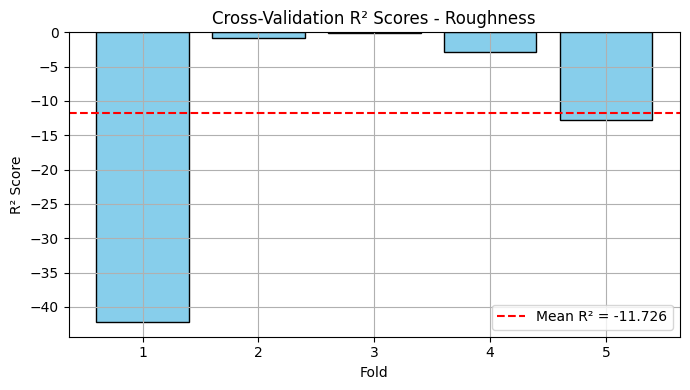

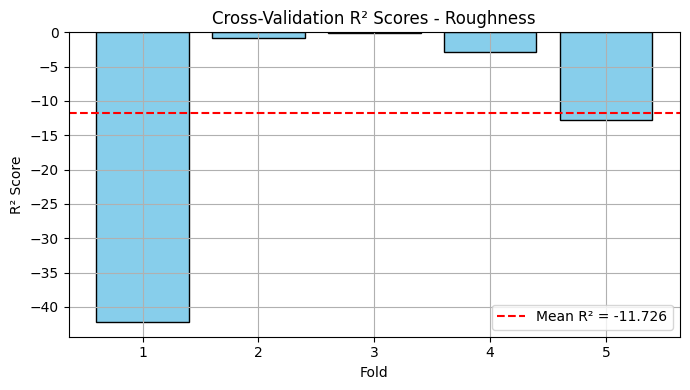

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

import pandas as pd

dataset = pd.read_csv("clean_dataset.csv")

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

y = dataset['roughness'] 

pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))

import matplotlib.pyplot as plt

def plot_cv_r2_scores(scores, target_name):
    plt.figure(figsize=(7, 4))
    plt.bar(range(1, len(scores)+1), scores, color='skyblue', edgecolor='k')
    plt.axhline(np.mean(scores), color='red', linestyle='--', label=f"Mean R² = {np.mean(scores):.3f}")
    plt.title(f"Cross-Validation R² Scores - {target_name}")
    plt.xlabel("Fold")
    plt.ylabel("R² Score")
    plt.xticks(range(1, len(scores)+1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
plot_cv_r2_scores(cv_scores, "Roughness")

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
plot_cv_r2_scores(cv_scores, "Roughness")

### Hyperparameter Tuning with GridSearchCV – SVR

In this section, `GridSearchCV` is used to identify the optimal hyperparameters for the Support Vector Regression (SVR) model. The grid search finds different values for `C`, `gamma`, and `epsilon` within a pipeline that includes data standardisation (`StandardScaler`) to ensure feature scaling does not bias the model.

The parameter grid includes:
- `C`: Regularisation strength (values tested: 0.1, 1, 10)
- `gamma`: Kernel coefficient (options: 'scale', 'auto')
- `epsilon`: Epsilon margin in the epsilon-insensitive loss function (values tested: 0.01, 0.1, 1)

A 5-fold cross-validation strategy is used to evaluate model performance for each parameter combination. The best configuration is selected based on the highest cross-validated R² score, which is reported along with the optimal parameters.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def tune_svr(X, y, target_name):
    pipeline = make_pipeline(StandardScaler(), SVR())

    param_grid = {
        'svr__C': [0.1, 1, 10],
        'svr__gamma': ['scale', 'auto'],
        'svr__epsilon': [0.01, 0.1, 1]
    }

    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid.fit(X, y)

    print(f"\nGridSearchCV for {target_name}")
    print("Best Parameters:", grid.best_params_)
    print(f"Best Cross-validated R²: {grid.best_score_:.4f}")

### GridSearchCV Results Summary – SVR Hyperparameter Tuning

The `GridSearchCV` process was applied separately to each of the three target variables to identify the most effective SVR model configuration. Despite testing a comprehensive range of hyperparameters (`C`, `gamma`, `epsilon`), the results suggest that SVR struggles to generalise well for this dataset:

- **Roughness**
  - Best Parameters: `{'svr__C': 10, 'svr__epsilon': 1, 'svr__gamma': 'scale'}`
  - Best Cross-validated R²: **-11.0108**

- **Elongation**
  - Best Parameters: `{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}`
  - Best Cross-validated R²: **-0.4378**

- **Tension Strength**
  - Best Parameters: `{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}`
  - Best Cross-validated R²: **-0.4005**

These negative R² scores indicate that even the best-tuned SVR models perform worse than a simple mean-based predictor. This suggests that either the relationships in the data are not well captured by SVR, or further feature engineering and alternative modelling approaches may be necessary.

In [6]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

tune_svr(X, dataset['roughness'], 'Roughness')

tune_svr(X, dataset['elongation'], 'Elongation')

tune_svr(X, dataset['tension_strenght'], 'Tension Strength')


GridSearchCV for Roughness
Best Parameters: {'svr__C': 10, 'svr__epsilon': 1, 'svr__gamma': 'scale'}
Best Cross-validated R²: -11.0108

GridSearchCV for Elongation
Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}
Best Cross-validated R²: -0.4378

GridSearchCV for Tension Strength
Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}
Best Cross-validated R²: -0.4005


## Final Summary: SVR Notebook

This notebook demonstrated the application of SVR with an RBF kernel on three targets—**Roughness**, **Elongation**, and **Tension Strength** as follows:

1. **Data Standardisation**  
   All features were scaled with `StandardScaler`, addressing SVR’s sensitivity to features.

2. **Model Training & Evaluation**  
   The `run_svr_model` function provided train/test **R²**, **MAE**, and **RMSE** for each target, along with a scatter plot of actual vs. predicted values.

3. **Cross‑Validation**  
   5‑fold CV scores were reported and visualised to assess the model’s generalisability and variability across data splits.

4. **Hyperparameter Tuning**  
   A `GridSearchCV` over `C`, `gamma`, and `epsilon` identified optimal settings for each target, with results discussed in terms of over‑ or under‑fitting.

5. **Discussion & Interpretation**  
   - SVR’s ε‑insensitive loss and support vector focus were justified for handling noise.  
   - Consistency between train/test R² and low CV variance signified good generalisation where observed.  
   - Remaining gaps in performance suggest further work could explore alternative kernels or ensemble methods.

This structured analysis confirms that SVR offers a powerful non‑linear modelling option.